In [1]:
import pickle
from collections import Counter
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from random import randint

In [2]:
with open('mc_list.p', 'rb') as f:
    mc_list = pickle.load(f)
with open('twolyr_list.p', 'rb') as f:
    twolyr_list = pickle.load(f)
with open('random_list.p', 'rb') as f:
    random_list = pickle.load(f)
with open('verse.pkl', 'rb') as fb:
    verse_list = pickle.load(fb)    

In [3]:
#Get 100 random samples from the verse_list
real_list=[]
for i in range(100):

    num=randint(0,len(verse_list)-1)
 
    real_list.append(verse_list[num])

rl_list=[]
for j in real_list:
    a=' '.join(j)
    rl_list.append(a)

In [12]:
def get_frequency(songs):  
    
    #get a list of all words and count them
    holds=[]


    for item in songs:
        holds.append(item)

    allsongs=' '.join(holds)

    allwords=allsongs.split()

    #count all words
    allwordcount=Counter(allwords)

    #print("Has list of all words")

    #split each song up in words
    wordssongs=[]
    for song in songs:
        hold=song.split()
        wordssongs.append(hold)

    songscount=[]
    for i in wordssongs:
        songscount.append(Counter(i))

    #print("Has list of words in songs")

    #calculates how often a word appears in each document

    freqall=[]

    for song in songscount:
        hold=[]

        #if word is in the song then lookup how often if not add 0
        for key in allwordcount:
            if key in song:
                val=song.get(key)
                hold.append(val)
            else:
                hold.append(0)

        freqall.append(hold) 

        
        
    #Calculations for inverse document frequency

    #calculates in how many documents each word appears
    nj=[]
    for key in allwordcount:
        has=0
        for song in songscount:
            if key in song:
                has=has+1
        nj.append(has)
    #print(nj)

    #the total number of documents
    N=len(songs)
    #print(N)

    #calculates the inverse document frequency for each word in each document
    allwij=[]
    for song in freqall:
        songfreq=[]
        for wordfreq,docfreq in zip(song,nj):
            wij=wordfreq*np.log(N/docfreq)
            songfreq.append(wij)
        allwij.append(songfreq)

    return freqall,allwij

In [5]:
def get_results(freqall,allwij):
    #Calculate the cosine similarity with normal and inverted frequency

    results=cosine_similarity(freqall, freqall)
    results_infreq=cosine_similarity(allwij,allwij)


    #Reshape the results 
    freq=np.array(results)
    freq.shape=(len(results),len(results))

    infreq = np.array(results_infreq)
    infreq.shape=(len(results_infreq),len(results_infreq))

    #Show the results as a heatmap
    plt.imshow(infreq)
    plt.colorbar()
    plt.show()

    plt.imshow(freq)
    plt.colorbar()
    plt.show()

The Inverted Cosine Frequency and Cosine Frequency for: allverse


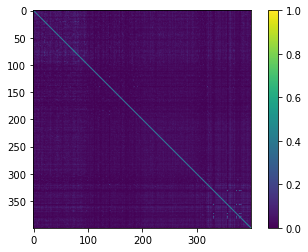

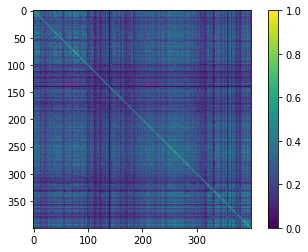

The Inverted Cosine Frequency and Cosine Frequency for: twolyr_list


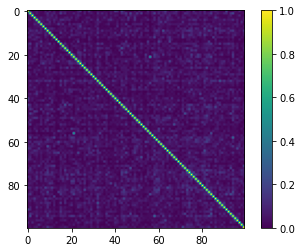

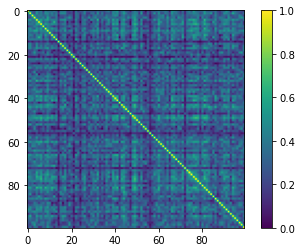

The Inverted Cosine Frequency and Cosine Frequency for: mc_list


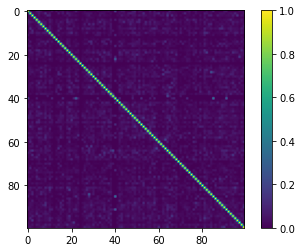

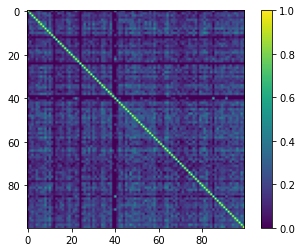

The Inverted Cosine Frequency and Cosine Frequency for: random_list


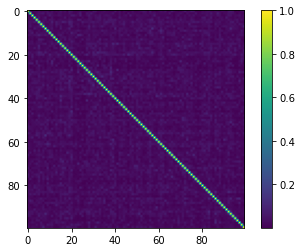

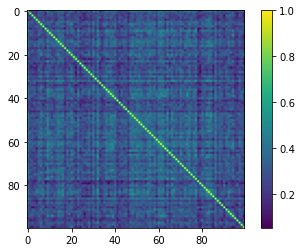

The Inverted Cosine Frequency and Cosine Frequency for: rl_list


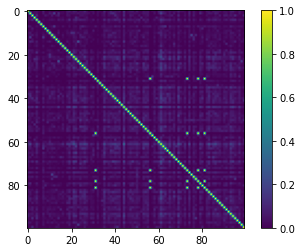

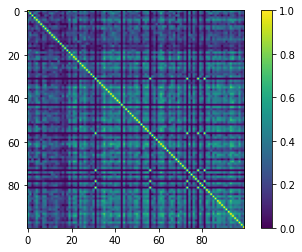

In [14]:
allverse=twolyr_list+mc_list+random_list+rl_list

names=["All Compared","twolyr_list","mc_list","random_list","rl_list"]
tries=[allverse,twolyr_list,mc_list,random_list,rl_list,]

for lis,name in zip(tries,names):
    print("The Inverted Cosine Frequency and Cosine Frequency for:",name)
    freqall,allwij=get_frequency(lis)
    get_results(freqall,allwij)

Has list of all words
Has list of words in songs
100


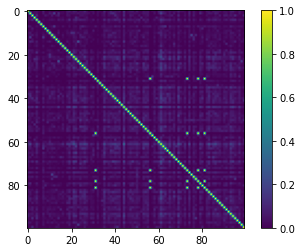

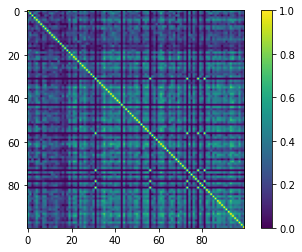

In [7]:

mc_tl=[twolyr_list,mc_list]

mc_rnd=mc_list+random_list

mc_rl=mc_list+rl_list

rl_rnd=rl_list+random_list

#rl_rl=rl_list

songs=mc_list

freqall,allwij=get_frequency(rl_list)
get_results(freqall,allwij)

In [8]:
#Calculating the frequency of each word in each document

In [9]:
 
    #calculates how often a word appears in each document

    freqall=[]

    for song in songscount:
        hold=[]

        #if word is in the song then lookup how often if not add 0
        for key in allwordcount:
            if key in song:
                val=song.get(key)
                hold.append(val)
            else:
                hold.append(0)

        freqall.append(hold) 

    #Calculations for inverse document frequency

    #calculates in how many documents each word appears
    nj=[]
    for key in allwordcount:
        has=0
        for song in songscount:
            if key in song:
                has=has+1
        nj.append(has)
    #print(nj)

    #the total number of documents
    N=len(songs)
    print(N)

    #calculates the inverse document frequency for each word in each document
    allwij=[]
    for song in freqall:
        songfreq=[]
        for wordfreq,docfreq in zip(song,nj):
            wij=wordfreq*np.log(N/docfreq)
            songfreq.append(wij)
        allwij.append(songfreq)





NameError: name 'songscount' is not defined

In [ ]:
#Extra calculations for inverse document frequency

In [ ]:
#calculates in how many documents each word appears
nj=[]
for key in allwordcount:
    has=0
    for song in songscount:
        if key in song:
            has=has+1
    nj.append(has)
#print(nj)

In [ ]:
#the total number of documents
N=len(songs)
print(N)

In [ ]:
#calculates the inverse document frequency for each word in each document
allwij=[]
for song in freqall:
    songfreq=[]
    for wordfreq,docfreq in zip(song,nj):
        wij=wordfreq*np.log(N/docfreq)
        songfreq.append(wij)
    allwij.append(songfreq)
    
        
    
    

In [ ]:
#Comparing the results